In [1]:
data <- read.csv("new_chr18_static_classified.csv")
head(data,10)
# tail(data,10)
# head(read.csv("new_chr19_static_classified.csv"))

X,binID,start,cata,aRead,bRead,aNorm,bNorm
94666,chr18_3000100,3000000,3,18,29,51.428571,54.716981
42546,chr18_3000100,3000000,2,14,22,40.000000,41.509434
1,chr18_3000100,3000000,1,3,2,8.571429,3.773585
94667,chr18_3000200,3000100,3,53,60,37.857143,32.967033
42547,chr18_3000200,3000100,2,66,95,47.142857,52.197802
2,chr18_3000200,3000100,1,21,27,15.000000,14.835165
94668,chr18_3001600,3001500,3,18,46,23.076923,34.328358
42548,chr18_3001600,3001500,2,37,47,47.435897,35.074627
3,chr18_3001600,3001500,1,23,41,29.487179,30.597015
94669,chr18_3003400,3003300,3,14,25,14.583333,17.985612


In [2]:
high_sub <- data[data$cata == 3, c("binID", "start", "aRead")]
names(high_sub) <- c("binID", "start", "high")
# head(high_sub)
medium_sub <- data[data$cata == 2, c("binID", "start", "aRead")]
names(medium_sub) <- c("binID", "start", "medium")
# head(medium_sub)
low_sub <- data[data$cata == 1, c("binID", "start", "aRead")]
names(low_sub) <- c("binID", "start", "low")
# head(low_sub)

# merge
clusterdf <- merge(high_sub, medium_sub, all = TRUE)
clusterdf <- merge(clusterdf, low_sub, all = TRUE)
clusterdf <- clusterdf[order(as.numeric(clusterdf$start)),]
clusterdf[is.na(clusterdf)] <- 0
head(clusterdf,10)

,binID,start,high,medium,low
10049,chr18_3000100,3000000,18,14,3
10051,chr18_3000200,3000100,53,66,21
10070,chr18_3001600,3001500,18,37,23
10077,chr18_3003400,3003300,14,50,32
10081,chr18_3003800,3003700,191,28,10
10088,chr18_3005600,3005500,66,48,6
10111,chr18_3009000,3008900,335,85,54
10114,chr18_3009100,3009000,198,123,18
10123,chr18_3011500,3011400,27,12,0
10127,chr18_3011900,3011800,120,19,3


In [3]:
paste("Total number of Bins:", nrow(clusterdf))

[1] "Total number of Bins: 55463"

In [4]:
# write.csv(clusterdf, "A_clusterdf_count.csv")

In [5]:
dist_tolerance <- 100
# meth_tolerance <- 40 
# cor_2_cutoff <- 0.9
alpha <- 0.05

In [6]:
pre.row <- clusterdf[1,]

dist.fun <- function(row) {
    dist <- as.numeric(as.character(row["start"])) - as.numeric(as.character(pre.row["start"]))
    pre.row <<- row
    return(c(row["binID"], row["start"], row["high"], row["medium"], row["low"], dist = dist)) 
}

dist.result <- t(apply(clusterdf, 1, dist.fun))
dist.result <- as.data.frame(dist.result)
head(dist.result, 30)

,binID,start,high,medium,low,dist
10049,chr18_3000100,3000000,18,14,3,0
10051,chr18_3000200,3000100,53,66,21,100
10070,chr18_3001600,3001500,18,37,23,1400
10077,chr18_3003400,3003300,14,50,32,1800
10081,chr18_3003800,3003700,191,28,10,400
10088,chr18_3005600,3005500,66,48,6,1800
10111,chr18_3009000,3008900,335,85,54,3400
10114,chr18_3009100,3009000,198,123,18,100
10123,chr18_3011500,3011400,27,12,0,2400
10127,chr18_3011900,3011800,120,19,3,400


In [7]:
dist.result <- dist.result[as.numeric(as.character(dist.result$dist)) <= dist_tolerance, ]
head(dist.result)

dist.result <- dist.result[-1,]
head(dist.result)
nrow(dist.result)

,binID,start,high,medium,low,dist
10049,chr18_3000100,3000000,18,14,3,0
10051,chr18_3000200,3000100,53,66,21,100
10114,chr18_3009100,3009000,198,123,18,100
10128,chr18_3012000,3011900,70,34,18,100
10350,chr18_3039600,3039500,220,131,52,100
10369,chr18_3041700,3041600,107,7,3,100


,binID,start,high,medium,low,dist
10051,chr18_3000200,3000100,53,66,21,100
10114,chr18_3009100,3009000,198,123,18,100
10128,chr18_3012000,3011900,70,34,18,100
10350,chr18_3039600,3039500,220,131,52,100
10369,chr18_3041700,3041600,107,7,3,100
10372,chr18_3041800,3041700,100,104,38,100


[1] 7575

In [8]:
start.pos <- dist.result$start
complete <- lapply(start.pos, function(x) c(as.numeric(as.character(x))-100, as.numeric(as.character(x))))
complete <- Reduce(c, complete)
complete <- unique(complete)
complete

[1]  3000000  3000100  3008900  3009000  3011800  3011900  3039400  3039500
    [9]  3041500  3041600  3041700  3045900  3046000  3046500  3046600  3053000
   [17]  3053100  3059600  3059700  3059800  3064100  3064200  3064300  3066400
   [25]  3066500  3066600  3092700  3092800  3098400  3098500  3101700  3101800
   [33]  3104300  3104400  3115200  3115300  3115800  3115900  3116000  3117400
   [41]  3117500  3117600  3118900  3119000  3119100  3119200  3140600  3140700
   [49]  3146000  3146100  3155700  3155800  3157600  3157700  3158300  3158400
   [57]  3158500  3193400  3193500  3215000  3215100  3215200  3218300  3218400
   [65]  3219300  3219400  3220400  3220500  3220600  3222000  3222100  3222300
   [73]  3222400  3227500  3227600  3230800  3230900  3250600  3250700  3251500
   [81]  3251600  3255000  3255100  3346700  3346800  3388200  3388300  3404800
   [89]  3404900  3413000  3413100  3459500  3459600  3459700  3459800  3459900
   [97]  3460000  3460600  3460700  3471600  3471700  3471800  3473000  3473100
  [105]  3473800  3473900  3477300  3477400  3477600  3477700  3477900  3478000
  [113]  3478100  3478200  3478500  3478600  3495000  3495100  3511300  3511400
  [121]  3520000  3520100  3576200  3576300  3610100  3610200  3619800  3619900
  [129]  3698000  3698100  3698200  3699900  3700000  3701000  3701100  3701800
  [137]  3701900  3702000  3721400  3721500  3723000  3723100  3723200  3723800
  [145]  3723900  3737000  3737100  3737200  3737600  3737700  3737800  3738200
  [153]  3738300  3738400  3738500  3746800  3746900  3773800  3773900  3785500
  [161]  3785600  3816000  3816100  3864600  3864700  3864800  3873700  3873800
  [169]  3873900  3874900  3875000  3949400  3949500  3970700  3970800  3977400
  [177]  3977500  4010100  4010200  4010400  4010500  4013100  4013200  4013300
  [185]  4031800  4031900  4053400  4053500  4151300  4151400  4222600  4222700
  [193]  4222800  4233100  4233200  4293200  4293300  4293700  4293800  4297300
  [201]  4297400  4321100  4321200  4334500  4334600  4334700  4353100  4353200
  [209]  4364200  4364300  4384100  4384200  4384300  4412300  4412400  4474100
  [217]  4474200  4474300  4479700  4479800  4494200  4494300  4494400  4495200
  [225]  4495300  4504900  4505000  4512800  4512900  4519800  4519900  4520000
  [233]  4533500  4533600  4537000  4537100  4537200  4537300  4537400  4543700
  [241]  4543800  4543900  4554100  4554200  4569300  4569400  4649100  4649200
  [249]  4657500  4657600  4658100  4658200  4661500  4661600  4669100  4669200
  [257]  4669300  4673500  4673600  4674400  4674500  4674600  4681800  4681900
  [265]  4683000  4683100  4701500  4701600  4707800  4707900  4713300  4713400
  [273]  4728500  4728600  4743700  4743800  4757500  4757600  4762000  4762100
  [281]  4786100  4786200  4808300  4808400  4808500  4808600  4819200  4819300
  [289]  4850400  4850500  4853300  4853400  4860200  4860300  4860400  4860900
  [297]  4861000  4862600  4862700  4873700  4873800  4879300  4879400  4886300
  [305]  4886400  4886500  4920100  4920200  4920300  4955300  4955400  4961500
  [313]  4961600  5012700  5012800  5017800  5017900  5024200  5024300  5039300
  [321]  5039400  5048000  5048100  5067100  5067200  5067300  5068700  5068800
  [329]  5088900  5089000  5094800  5094900  5095000  5097500  5097600  5097700
  [337]  5099500  5099600  5100000  5100100  5100200  5100300  5110300  5110400
  [345]  5111000  5111100  5111200  5111400  5111500  5138300  5138400  5139200
  [353]  5139300  5149800  5149900  5161300  5161400  5213200  5213300  5235800
  [361]  5235900  5281100  5281200  5301600  5301700  5313800  5313900  5317000
  [369]  5317100  5345300  5345400  5363800  5363900  5364600  5364700  5407300
  [377]  5407400  5409800  5409900  5433800  5433900  5435300  5435400  5435900
  [385]  5436000  5436100  5438300  5438400  5438500  5440400  5440500  5478500
  [393]  5478600  5499300  5499400  5500600  5500700  5500800  5584300  5584400
  [4

In [9]:
grouping <- clusterdf[as.numeric(as.character(clusterdf$start)) %in% complete, ]
dist.result <- as.data.frame(grouping)
head(grouping,10)

,binID,start,high,medium,low
10049,chr18_3000100,3000000,18,14,3
10051,chr18_3000200,3000100,53,66,21
10111,chr18_3009000,3008900,335,85,54
10114,chr18_3009100,3009000,198,123,18
10127,chr18_3011900,3011800,120,19,3
10128,chr18_3012000,3011900,70,34,18
10349,chr18_3039500,3039400,73,66,29
10350,chr18_3039600,3039500,220,131,52
10368,chr18_3041600,3041500,193,67,15
10369,chr18_3041700,3041600,107,7,3


In [10]:
pre.row <- dist.result[1,]

test.fun <- function(row) {
    if (as.numeric(as.character(row["start"])) - as.numeric(as.character(pre.row["start"])) > 100) {
        pre.row <<- row
        return(c(row["binID"], start = as.character(row["start"]), p.value = "0"))
    } else {
        test.matrix <- cbind(c(as.numeric(as.character(pre.row["high"])),
                               as.numeric(as.character(pre.row["medium"])),
                               as.numeric(as.character(pre.row["low"]))),
                             c(as.numeric(as.character(row["high"])), 
                               as.numeric(as.character(row["medium"])),
                               as.numeric(as.character(row["low"]))))
        test.matrix <- test.matrix[rowSums(test.matrix) > 0, ]
        value <- suppressWarnings(chisq.test(test.matrix)$p.value)
        pre.row <<- row
        return(c(row["binID"], start = as.character(row["start"]), p.value = as.character(value)))
    }
}

test.result <- apply(dist.result[-1,], MARGIN = 1, FUN = test.fun)
test.result <- t(test.result)
test.result <- as.data.frame(test.result)
head(test.result)

,binID,start,p.value
10051,chr18_3000200,3000100,0.29709944033302
10111,chr18_3009000,3008900,0
10114,chr18_3009100,3009000,3.73822038327719e-09
10127,chr18_3011900,3011800,0
10128,chr18_3012000,3011900,1.54894770409585e-06
10349,chr18_3039500,3039400,0


In [11]:
good.result <- test.result[as.numeric(as.character(test.result$p.value)) > alpha,]
head(good.result)

,binID,start,p.value
10051,chr18_3000200,3000100,0.29709944033302
10438,chr18_3053200,3053100,0.53758930854046
10504,chr18_3064300,3064200,0.956767512904227
10517,chr18_3066600,3066500,0.115570305565864
10645,chr18_3092900,3092800,0.212852431807617
10684,chr18_3101900,3101800,0.366864737291055


In [12]:
start.pos <- good.result$start
complete <- lapply(start.pos, function(x) c(as.numeric(as.character(x))-100, as.numeric(as.character(x))))
complete <- Reduce(c, complete)
complete <- unique(complete)
complete

[1]  3000000  3000100  3053000  3053100  3064100  3064200  3066400  3066500
   [9]  3092700  3092800  3101700  3101800  3115800  3115900  3116000  3117400
  [17]  3117500  3117600  3119100  3119200  3140600  3140700  3157600  3157700
  [25]  3158300  3158400  3215100  3215200  3218300  3218400  3222300  3222400
  [33]  3230800  3230900  3413000  3413100  3459500  3459600  3459700  3459800
  [41]  3459900  3460600  3460700  3473000  3473100  3473800  3473900  3477300
  [49]  3477400  3478500  3478600  3576200  3576300  3619800  3619900  3698000
  [57]  3698100  3698200  3701900  3702000  3723000  3723100  3737100  3737200
  [65]  3737600  3737700  3785500  3785600  3816000  3816100  3873700  3873800
  [73]  3873900  3874900  3875000  3949400  3949500  3977400  3977500  4010100
  [81]  4010200  4013100  4013200  4031800  4031900  4053400  4053500  4151300
  [89]  4151400  4222700  4222800  4233100  4233200  4297300  4297400  4384100
  [97]  4384200  4384300  4474200  4474300  4479700  4479800  4495200  4495300
 [105]  4504900  4505000  4537000  4537100  4537200  4537300  4537400  4543700
 [113]  4543800  4543900  4554100  4554200  4658100  4658200  4661500  4661600
 [121]  4669100  4669200  4674400  4674500  4674600  4681800  4681900  4701500
 [129]  4701600  4707800  4707900  4713300  4713400  4743700  4743800  4757500
 [137]  4757600  4850400  4850500  4860200  4860300  4860400  4860900  4861000
 [145]  4873700  4873800  4879300  4879400  4886300  4886400  4886500  4955300
 [153]  4955400  4961500  4961600  5012700  5012800  5067100  5067200  5088900
 [161]  5089000  5094800  5094900  5097600  5097700  5100000  5100100  5110300
 [169]  5110400  5111000  5111100  5111200  5111400  5111500  5235800  5235900
 [177]  5281100  5281200  5301600  5301700  5313800  5313900  5345300  5345400
 [185]  5364600  5364700  5435900  5436000  5436100  5438300  5438400  5478500
 [193]  5478600  5500600  5500700  5500800  5593800  5593900  5599300  5599400
 [201]  5599500  5635200  5635300  5656800  5656900  5766300  5766400  5870300
 [209]  5870400  5870500  6043900  6044000  6045000  6045100  6045200  6045300
 [217]  6083800  6083900  6095600  6095700  6136300  6136400  6174600  6174700
 [225]  6187700  6187800  6221300  6221400  6256900  6257000  6261300  6261400
 [233]  6261500  6261600  6261700  6261800  6281600  6281700  6292700  6292800
 [241]  6292900  6325700  6325800  6349300  6349400  6349700  6349800  6349900
 [249]  6350000  6350100  6350800  6350900  6354000  6354100  6354500  6354600
 [257]  6365000  6365100  6365200  6405500  6405600  6410200  6410300  6410400
 [265]  6415000  6415100  6419300  6419400  6429500  6429600  6433900  6434000
 [273]  6439700  6439800  6444100  6444200  6477900  6478000  6549600  6549700
 [281]  6549900  6550000  6632600  6632700  6679700  6679800  6718600  6718700
 [289]  6719700  6719800  6727200  6727300  6772600  6772700  6796800  6796900
 [297]  6797000  6802900  6803000  6854500  6854600  6855600  6855700  6912600
 [305]  6912700  6962700  6962800  6974000  6974100  6974200  7002200  7002300
 [313]  7003300  7003400  7059800  7059900  7060000  7060300  7060400  7060500
 [321]  7062900  7063000  7071400  7071500  7071600  7170200  7170300  7240800
 [329]  7240900  7265000  7265100  7319600  7319700  7319900  7320000  7321100
 [337]  7321200  7322500  7322600  7326100  7326200  7326300  7400500  7400600
 [345]  7401300  7401400  7510900  7511000  7556500  7556600  7566200  7566300
 [353]  7687400  7687500  7715100  7715200  7717100  7717200  7718100  7718200
 [361]  7719800  7719900  7725900  7726000  7727900  7728000  7774100  7774200
 [369]  7827700  7827800  7838300  7838400  7856300  7856400  7858600  7858700
 [377]  7881300  7881400  7922600  7922700  7923300  7923400  7933000  7933100
 [385]  7933200  7942700  7942800  7966700  7966800  7967400  7967500  7967600
 [393]  7968600  7968700  7968800  7968900  7969700  7969800  7971300  7971400
 [401]  7985700  7985800  8050700  8050800  8051100  

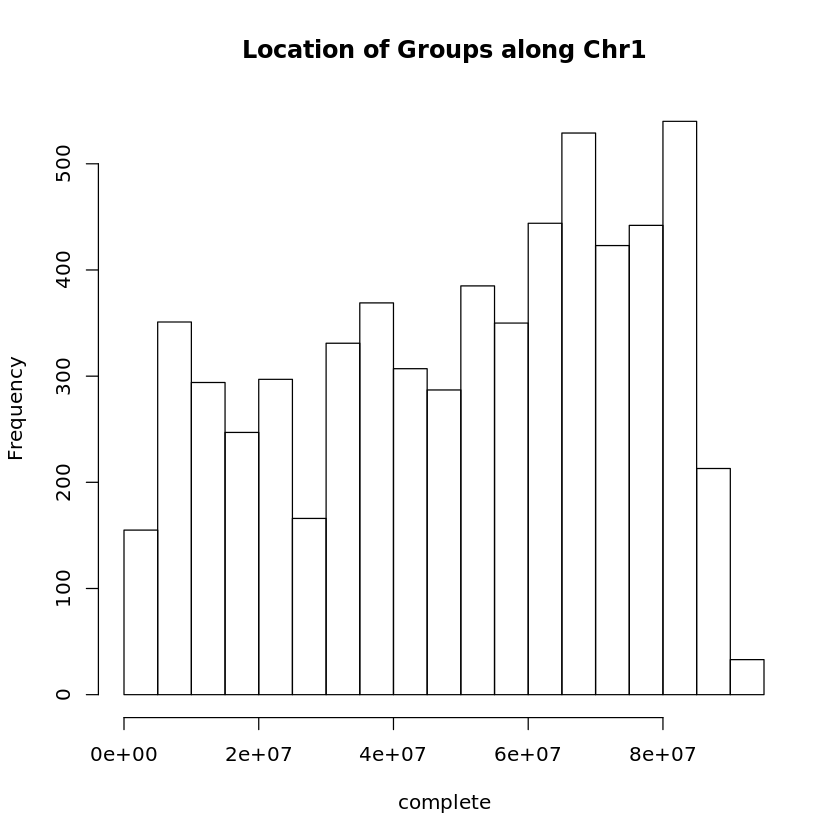

In [13]:
hist(complete, main = "Location of Groups along Chr1")

In [14]:
grouping <- clusterdf[as.numeric(as.character(clusterdf$start)) %in% complete, ]
grouping <- as.data.frame(grouping)
head(grouping,10)

,binID,start,high,medium,low
10049,chr18_3000100,3000000,18,14,3
10051,chr18_3000200,3000100,53,66,21
10437,chr18_3053100,3053000,9,1,0
10438,chr18_3053200,3053100,40,9,4
10503,chr18_3064200,3064100,176,32,2
10504,chr18_3064300,3064200,63,11,1
10516,chr18_3066500,3066400,183,43,5
10517,chr18_3066600,3066500,202,65,13
10644,chr18_3092800,3092700,72,7,3
10645,chr18_3092900,3092800,188,31,3


In [15]:
paste("Total number of bins grouped:", nrow(grouping))

[1] "Total number of bins grouped: 6163"

In [16]:
library(ggplot2)

In [17]:
pre.row <- grouping[1,]

part <- data.frame()
part <- rbind(part, pre.row)

counter = 1
sep.fun <- function(row) {
    if (as.numeric(as.character(row["start"])) - as.numeric(as.character(pre.row["start"])) > 100) {
        part <<- rbind(part, data.frame(binID = c(paste("gap", counter)), 
                                        start = c(0), high = c(100), medium = c(100), low = c(100)))
        counter <<- counter + 1
    }
    part <<- rbind(part, row)
    pre.row <<- row
}

invisible(apply(grouping[-1,], 1, sep.fun))

In [18]:
part[20:60,]

,binID,start,high,medium,low
20,chr18_3116000,3115900,53,8,0
21,chr18_3116100,3116000,29,5,0
110,gap 7,0,100,100,100
23,chr18_3117500,3117400,178,20,0
24,chr18_3117600,3117500,101,16,1
25,chr18_3117700,3117600,26,4,0
112,gap 8,0,100,100,100
27,chr18_3119200,3119100,207,34,0
28,chr18_3119300,3119200,238,41,0
113,gap 9,0,100,100,100


In [19]:
head(part)
tail(part)

,binID,start,high,medium,low
10049,chr18_3000100,3000000,18,14,3
2,chr18_3000200,3000100,53,66,21
1,gap 1,0,100,100,100
4,chr18_3053100,3053000,9,1,0
5,chr18_3053200,3053100,40,9,4
11,gap 2,0,100,100,100


,binID,start,high,medium,low
13422,gap 2891,0,100,100,100
9051,chr18_90554000,90553900,126,34,5
9052,chr18_90554100,90554000,136,25,3
13423,gap 2892,0,100,100,100
9054,chr18_90598500,90598400,64,13,5
9055,chr18_90598600,90598500,57,18,1


In [20]:
write.csv(part, "chr18_A_group.csv")

[1] "Total Number of groups: 2893"

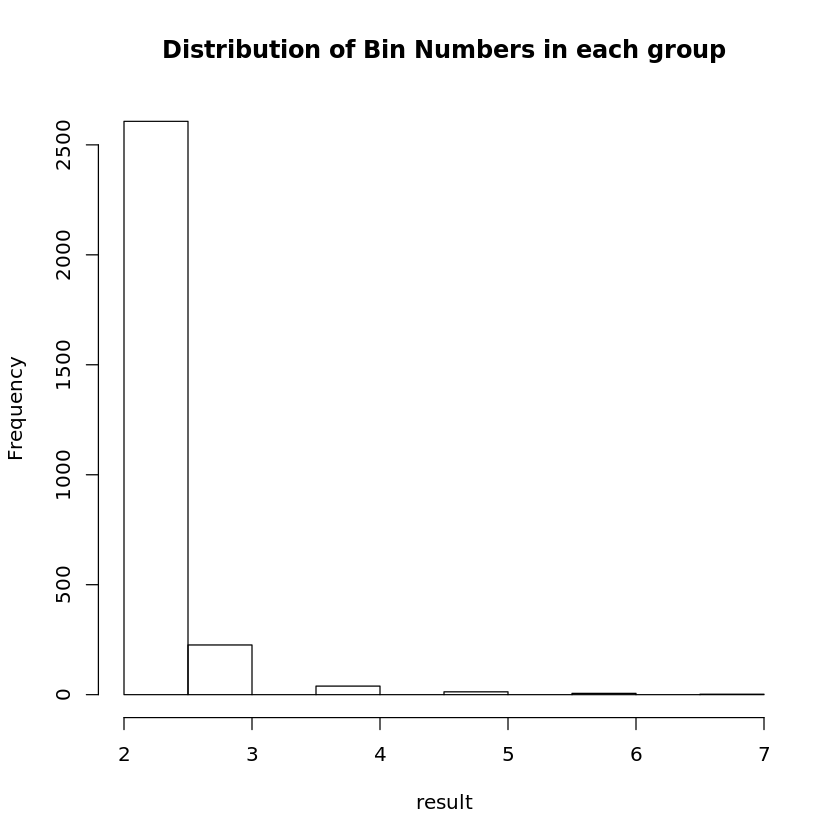

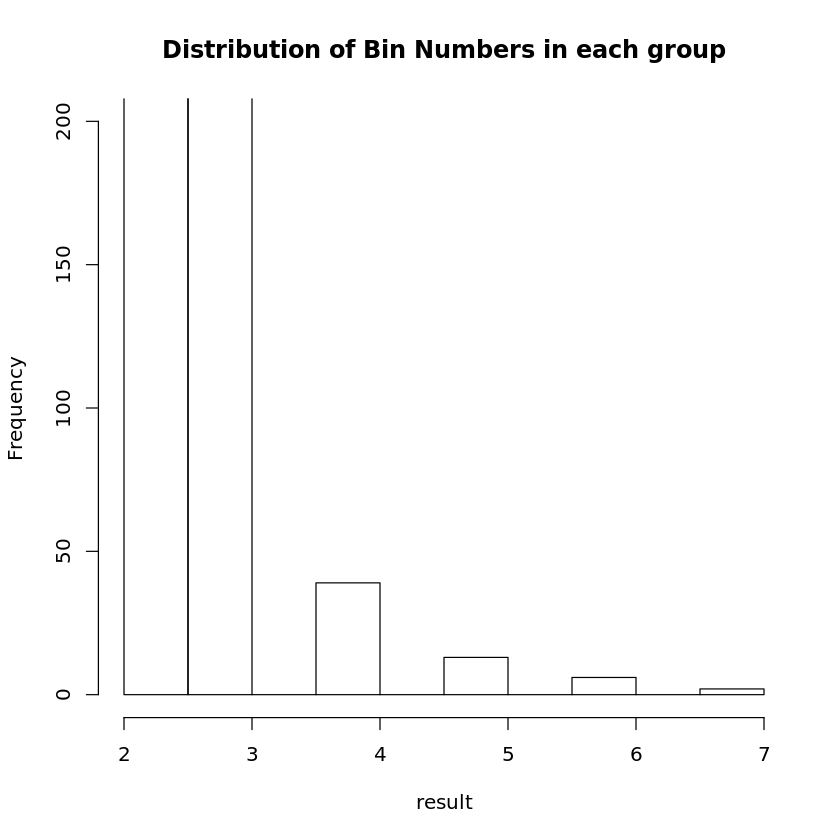

In [21]:
count = 0
result = c()
for (row in 1:nrow(part)) {
    if (substr(as.character(part[row, "binID"]), 1, 3) != "gap") {
        count = count + 1
    } else {
        result = c(result, count)
        count = 0
    }
}

result = c(result, count)

paste("Total Number of groups:", length(result))
hist(result, main = "Distribution of Bin Numbers in each group")
hist(result, ylim = c(0, 200), main = "Distribution of Bin Numbers in each group")

In [22]:
# plotdf <- data.frame(bin_ID = part[1,1], per = as.numeric(as.character(part[1,3])), cata = c(3))
# plotdf <- rbind(plotdf, data.frame(bin_ID = part[1,1], per = as.numeric(as.character(part[1,4])), cata = c(4)))
# plotdf <- rbind(plotdf, data.frame(bin_ID = part[1,1], per = as.numeric(as.character(part[1,5])), cata = c(5)))


# plotdf

In [23]:
# for (i in 2:nrow(part)){
#     if (substr(as.character(part[i,1]),1,3) == "gap"){
#         plotdf <- rbind(plotdf, data.frame(bin_ID = c(as.character(part[i,1])), per = c(100), cata = c(1)))
#     } else {
#         for (j in 3:5){
#             plotdf <- rbind(plotdf, data.frame(bin_ID = c(as.character(part[i,1])), per = c(as.numeric(as.character(part[i,j]))), cata = c(j)))
#         }
#     }
    
# }

# head(plotdf, 10)

In [24]:
# plotdf$cata <- factor(plotdf$cata, levels = c(3,4,5,1), labels = c("high", "medium", "low", "gap"))

# head(plotdf,100)

In [25]:
# plotdf$bin_ID <- factor(plotdf$bin_ID, levels = unique(plotdf$bin_ID))

In [26]:
# plotdf$per <- as.numeric(as.character(plotdf$per))

In [27]:
# names(plotdf) <- c("bin_ID", "count", "cata")

In [28]:
# ggplot(data = plotdf, aes(x = bin_ID, y = count, fill = factor(cata))) + coord_flip() + 
#   geom_bar(stat = "identity", width = 2) + ylim(0, 300) + scale_fill_brewer(palette="Spectral")

In [29]:
# zoomindf <- head(plotdf, 200)
# ggplot(data = zoomindf, aes(x = bin_ID, y = count, fill = factor(cata))) + 
#   geom_bar(stat = "identity") + ylim(0, 500) + scale_fill_brewer(palette="Spectral")